In [6]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [4]:
path = ''
filename ='GoodVision Traffic Counting using Camera Video Analytics _1.mp4'

### Comparing GMM and MoG

Frame number :  20


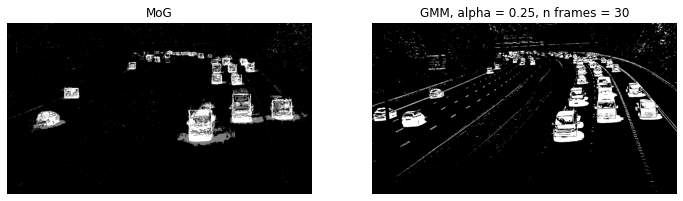

Frame number :  40


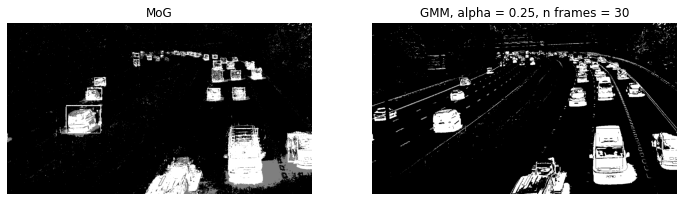

Frame number :  60


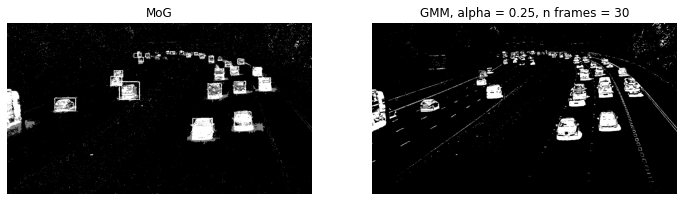

In [198]:
cap = cv2.VideoCapture(os.path.join(path, filename))

fgbgAdaptiveGaussain = cv2.createBackgroundSubtractorMOG2()
_, frame = cap.read()
first_gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
first_gray = cv2.GaussianBlur(first_gray, (5, 5), 0)
n_frames = 30
alpha = 0.25
background = np.tile(first_gray, (n_frames, 1)).reshape(n_frames, first_gray.shape[0], first_gray.shape[1])
frame_number = [20, 40, 60]
iframe_number = 0


while True:
  k = cv2.waitKey(1)
  ret, frame = cap.read()
  iframe_number += 1
  
  gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
  new_background = np.roll(background, -1, axis=0)
  new_background[-1] = gray_frame
  background = (1-alpha) * background + alpha * new_background

  fgbgAdaptiveGaussainmask = fgbgAdaptiveGaussain.apply(frame)

  if iframe_number in frame_number:
    print("Frame number : ", iframe_number)
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.imshow(fgbgAdaptiveGaussainmask, cmap='gray')
    plt.axis('off')
    plt.title('MoG')

    fgmask = cv2.absdiff(background.mean(axis=0).astype(np.uint8), gray_frame)
    _, fgmask = cv2.threshold(fgmask, 25, 255, cv2.THRESH_BINARY)
    plt.subplot(1, 2, 2)
    plt.imshow(fgmask, cmap='gray')
    plt.axis('off')
    plt.title('GMM, alpha = ' + str(alpha) + ", n frames = " + str(n_frames))
    plt.show()
    
    if iframe_number == frame_number[-1]:
        break

  if k == 27 or not ret:
    break

cap.release()

In [53]:
def gmm(n_frames, alpha):
  cap = cv2.VideoCapture(path + '/' + plik)
  _, frame = cap.read()
  first_gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
  first_gray = cv2.GaussianBlur(first_gray, (5, 5), 0)
  background = np.tile(first_gray, (n_frames, 1)).reshape(n_frames, first_gray.shape[0], first_gray.shape[1])
  frame_number = np.asarray([30, 60, 90])
  iframe_number = 0
  plt.figure(figsize=(18, 6))


  while True:
    ret, frame = cap.read()
    if not ret:
      break
    iframe_number += 1
    
    gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    new_background = np.roll(background, -1, axis=0)
    new_background[-1] = gray_frame
    background = (1-alpha) * background + alpha * new_background

    if iframe_number in frame_number:
      idx = np.where(frame_number == iframe_number)[0]
      fgmask = cv2.absdiff(background.mean(axis=0).astype(np.uint8), gray_frame)
      _, fgmask = cv2.threshold(fgmask, 25, 255, cv2.THRESH_BINARY)
      plt.subplot(1, 3, idx[0]+1)
      plt.imshow(fgmask, cmap='gray')
      plt.axis('off')
      plt.title('GMM, alpha = ' + str(alpha) + ", n frames = " + str(n_frames))
      
    if iframe_number == frame_number[-1]:
      plt.show()
      break
  cap.release()

### Effect of changing the number of frames on the quality of background removal

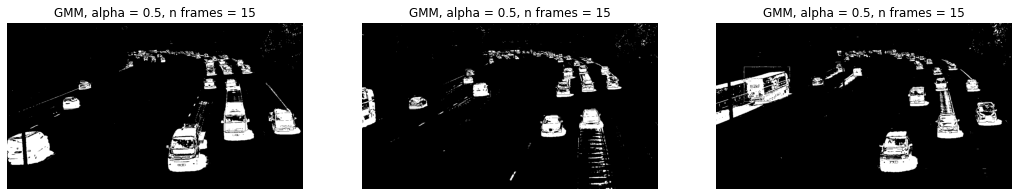

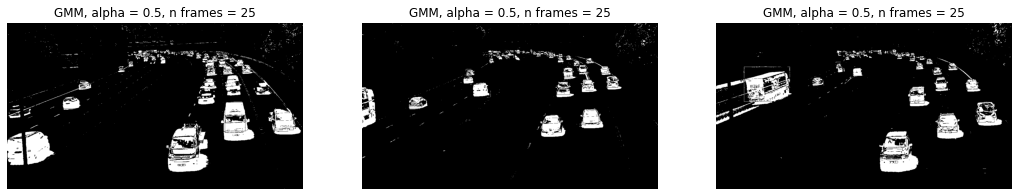

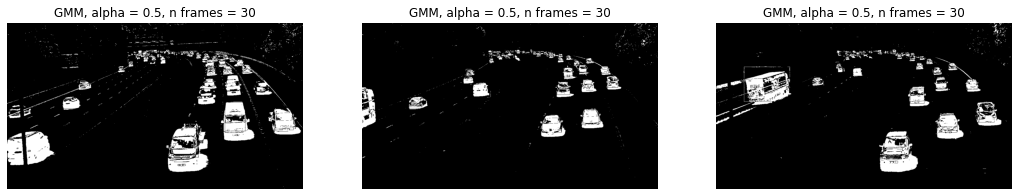

In [55]:
gmm(15, 0.5)
gmm(25, 0.5)
gmm(30, 0.5)

### Effect of changing the forgetting constant alpha on the quality of background removal

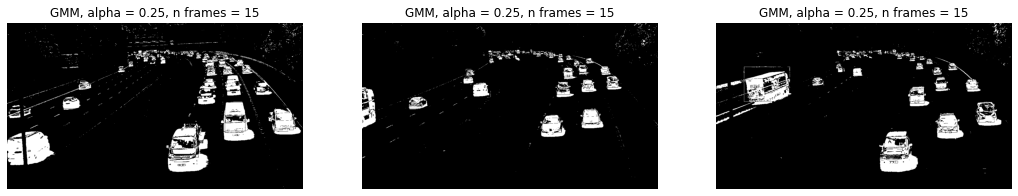

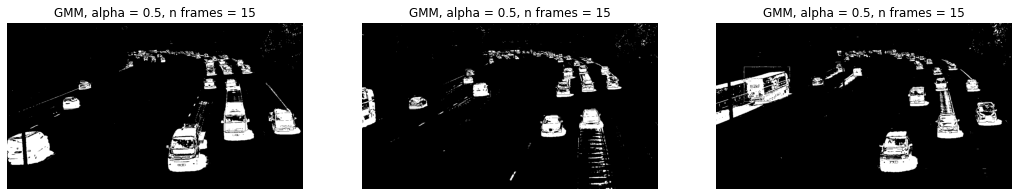

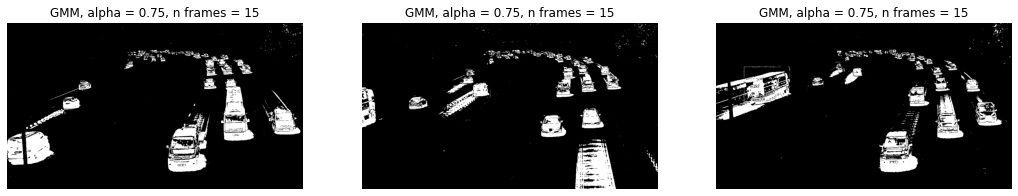

In [56]:
gmm(15, 0.25)
gmm(15, 0.5)
gmm(15, 0.75)

### Cos

In [195]:
def remove_shadow(alpha_, beta, tau_s, tau_h, frame_number):
  alpha = 0.25
  n_frames = 25
  
  cap = cv2.VideoCapture(path + '/' + plik)
  _, frame = cap.read()
  first_gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
  first_gray = cv2.GaussianBlur(first_gray, (5, 5), 0)
  background = np.tile(first_gray, (n_frames, 1)).reshape(n_frames, first_gray.shape[0], first_gray.shape[1])
  iframe_number = 0
  plt.figure(figsize=(18, 6))
  hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
  h, s, v = cv2.split(hsv)

  while True:
    ret, frame = cap.read()
    if not ret:
      break    
    iframe_number += 1
    
    gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    new_background = np.roll(background, -1, axis=0)
    new_background[-1] = gray_frame
    background = (1-alpha) * background + alpha * new_background
    fgmask = cv2.absdiff(background.mean(axis=0).astype(np.uint8), gray_frame)
    _, fgmask = cv2.threshold(fgmask, 25, 255, cv2.THRESH_BINARY)

    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
    h_new, s_new, v_new = cv2.split(hsv)

    shadow_mask = np.zeros_like(fgmask)
    shadow_mask = ((alpha_ <= v_new/v)* 1 * ((v_new/v <= beta) * 1) * ((np.abs(s_new - s) <= tau_s) * 1) * ((np.abs(h_new - h) <= tau_h) * 1)).astype(np.uint8)
    [h, s, v] = [h_new, s_new, v_new]

    if iframe_number in frame_number: 
      idx = np.where(frame_number == iframe_number)[0]
      print("alpha = " + str(alpha_) + ", beta = " + str(beta) + ", tau s = " + str(tau_s) + ", tau h = " + str(tau_h))
      plt.subplot(1, 3, 1)
      plt.imshow(shadow_mask, cmap='gray')
      plt.axis('off')
      plt.title('Maska cienia')

      plt.subplot(1, 3, 2)
      plt.imshow(fgmask, cmap='gray')
      plt.axis('off')
      plt.title('Zbinaryzowana ramka po wycięciu tła')

      plt.subplot(1, 3, 3)
      fgmask = fgmask * np.logical_not(shadow_mask)
      plt.imshow(fgmask, cmap='gray')
      plt.axis('off')
      plt.title('Zbinaryzowana ramka po usunięciu cienia')
      
    if iframe_number == frame_number[-1]:
      plt.show()
      break
  cap.release()
  # return shadow_mask.sum()

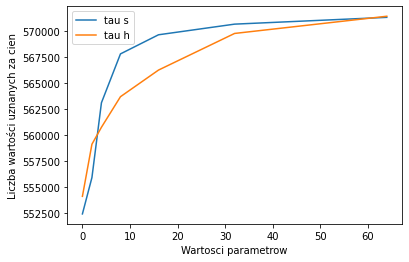

In [189]:
plt.plot(np.array(best_tau_s)[:, 0], np.array(best_tau_s)[:, 1], label='tau s')
plt.plot(np.array(best_tau_h)[:, 0], np.array(best_tau_h)[:, 1], label='tau h')
plt.ylabel("Liczba wartości uznanych za cien")
plt.xlabel("Wartosci parametrow")
plt.legend()
plt.show()

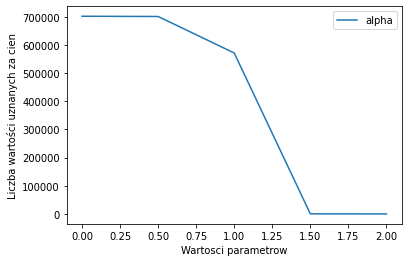

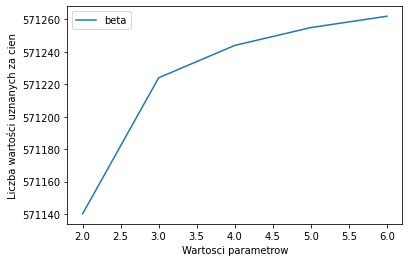

In [188]:
plt.plot(np.array(best_alpha)[:, 0], np.array(best_alpha)[:, 1], label='alpha')
plt.ylabel("Liczba wartości uznanych za cien")
plt.xlabel("Wartosci parametrow")
plt.legend()
plt.show()

plt.plot(np.array(best_beta)[:, 0], np.array(best_beta)[:, 1], label='beta')
plt.ylabel("Liczba wartości uznanych za cien")
plt.xlabel("Wartosci parametrow")
plt.legend()
plt.show()

alpha = 0, beta = 4, tau s = 30, tau h = 35


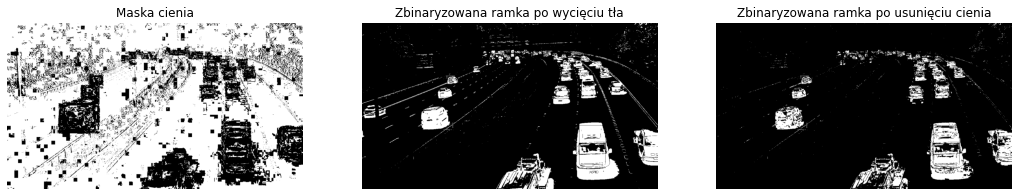

In [197]:
remove_shadow(0, 4, 30, 35, [40])

alpha = 0, beta = 6, tau s = 60, tau h = 60


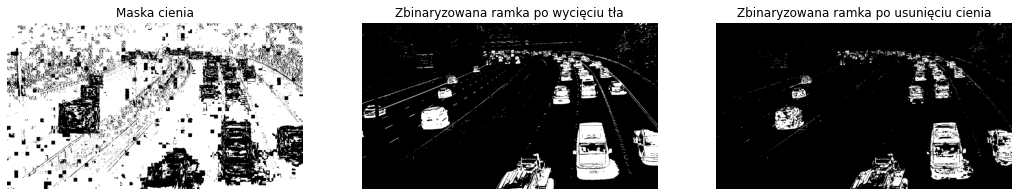

In [196]:
remove_shadow(0, 6, 60, 60, [40])

### Wnioski:
- The GMM background removal method showed better results than MoG due to a good choice of parameters.
- The smaller the contribution of the new frame to the background, the better the results. So, for example, the best results were obtained with alpha = 0.25 and number of frames = 30.
- The larger the parameter range, the more the shadow is removed, but nevertheless with this the elements of the objects are lost.